### Student Information
Name:

Student ID:112065710

GitHub ID:kolihhan

Kaggle name:Ko Lih Han

Kaggle private scoreboard snapshot:

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   
    Submit your last submission **BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)__. 

In [1]:
### Begin Assignment Here

## First Part

In [2]:
# Setup for Take Home Exercise
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])


from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]


# Funciton for visualizing confusion_matrix
## check by confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()
    
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

C:\Users\lihha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)
load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626911163330078),
 ('overjoyed', 0.6599287390708923),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437950134277344),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]


### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [3]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

#CountVectorizer for both dataset
cv_train = CountVectorizer()
cv_test = CountVectorizer()

#Fit Transform the dataset and return matrix
X_counts_train = cv_train.fit_transform(train_df.text)
X_counts_test = cv_test.fit_transform(test_df.text)

print(X_counts_test[0])

  (0, 1580)	1
  (0, 705)	2
  (0, 1060)	1
  (0, 1277)	1
  (0, 1579)	1
  (0, 1567)	1
  (0, 1122)	1
  (0, 1774)	1
  (0, 1739)	1
  (0, 1460)	1
  (0, 1576)	1
  (0, 1005)	1
  (0, 1212)	1
  (0, 1009)	2
  (0, 1041)	1
  (0, 1940)	1
  (0, 921)	1
  (0, 1938)	1
  (0, 892)	1
  (0, 616)	1
  (0, 1363)	1
  (0, 103)	1


In [4]:
term_freq = np.array(X_counts_train.sum(axis=0)).flatten()
train_top_terms = np.argsort(term_freq)[::-1][:30] #Get the index of terms
term_sort_frequencies_train = np.sort(term_freq)[::-1] #Count the terms freq

test_term_freq = np.array(X_counts_test.sum(axis=0)).flatten()
test_top_terms = np.argsort(test_term_freq)[::-1][:30] 
term_sort_frequencies_test = np.sort(test_term_freq)[::-1]



print(cv_train.get_feature_names_out()[train_top_terms])

print(cv_test.get_feature_names_out()[test_top_terms])

['the' 'to' 'and' 'you' 'of' 'is' 'it' 'in' 'that' 'my' 'for' 'on' 'be'
 'me' 'this' 'so' 'have' 'not' 'just' 'but' 'with' 'at' 'can' 'like' 'all'
 'are' 'your' 'was' 'when' 'if']
['the' 'to' 'and' 'it' 'of' 'you' 'is' 'in' 'for' 'that' 'my' 'on' 'be'
 'me' 'was' 'so' 'can' 'at' 'have' 'all' 'just' 'are' 'with' 'but' 'get'
 'your' 'up' 'this' 'like' 'not']


In [5]:
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=cv_train.get_feature_names_out()[train_top_terms], y=term_sort_frequencies_train)])

fig.show()


In [6]:
fig = go.Figure([go.Bar(x=cv_test.get_feature_names_out()[test_top_terms], y=term_sort_frequencies_test)])

fig.show()

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [7]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVec = TfidfVectorizer(max_features=1000)
tfidfVec.fit_transform(train_df['text'])
features_tf= tfidfVec.get_feature_names_out()

features_tf[100:110]

array(['bitter', 'black', 'blacks', 'blame', 'blessed', 'blood', 'bloody',
       'blues', 'body', 'boiling'], dtype=object)

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [8]:
# Answer here
# The confusion matrix shows that the model performs well overall, with high accuracy for predicting "fear" (76 correct predictions).
# However, it commonly misclassifies "anger" as "fear" (18 times) and "sadness" as "fear" (13 times), indicating overlapping features between these emotions. 

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [9]:
# Answer here
from sklearn.naive_bayes import MultinomialNB

nbModel = MultinomialNB()
nbModel.fit(X_train, y_train)

y_train_pred = nbModel.predict(X_train)
y_test_pred = nbModel.predict(X_test)

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

## precision, recall, f1-score,
print(classification_report(y_true=y_test, y_pred=y_test_pred))

training accuracy: 0.79
testing accuracy: 0.7
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


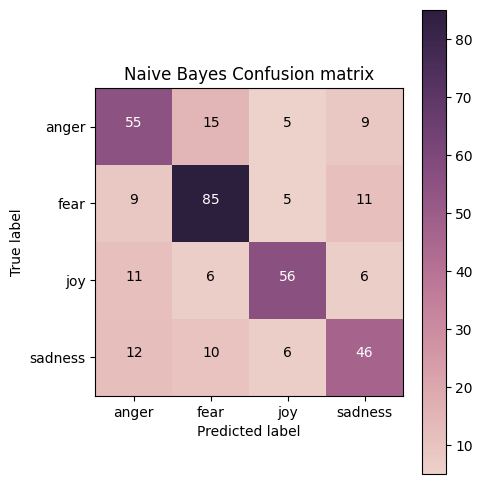

In [10]:
naiveCM = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(naiveCM)

# plot the naive bayes confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(naiveCM, classes=my_tags, title='Naive Bayes Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [11]:
# Answer here
# The decision tree achieved 99% accuracy on training data but only 68% on test data, indicating overfitting. 
# In contrast, the Naive Bayes model scored 79% on training and 70% on testing, demonstrating more consistent and better generalization. 
# Overall, Naive Bayes outperformed the decision tree by 2% on the test set and was less prone to overfitting.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![alt text](pics/pic3.png)

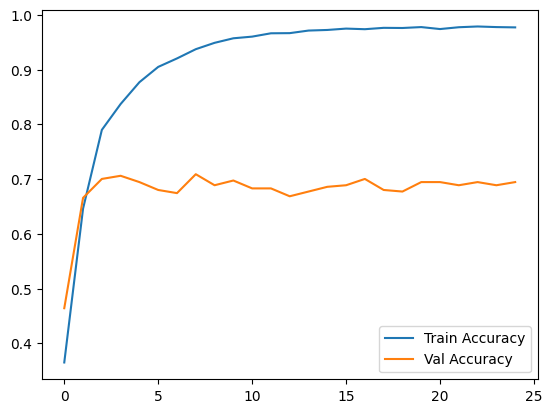

In [12]:
# Answer here
plt.plot(training_log['accuracy'], label='Train Accuracy')
plt.plot(training_log['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

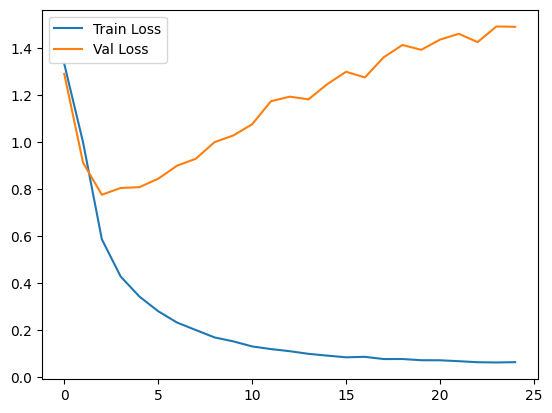

In [13]:
plt.plot(training_log['loss'], label='Train Loss')
plt.plot(training_log['val_loss'], label='Val Loss')
plt.legend()
plt.show()

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [14]:
# Answer here
# convert each word in the sentence to its corresponding vector. Then, create a single sentence representation by averaging or summing these vectors
# or using models like Transformers that handle sequences and capture word relationships.


### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'e

C:\Users\lihha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



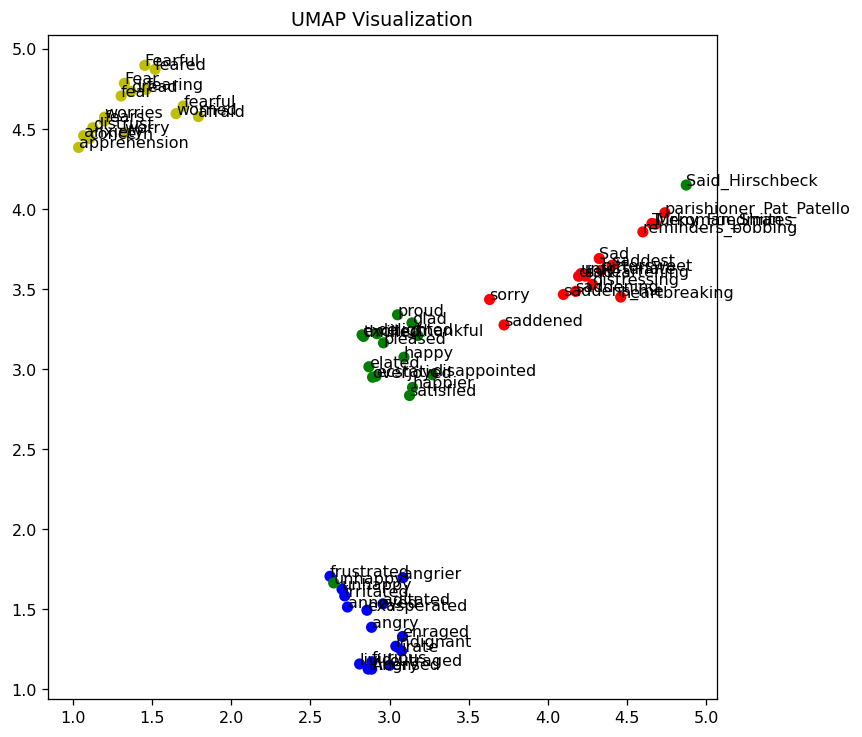

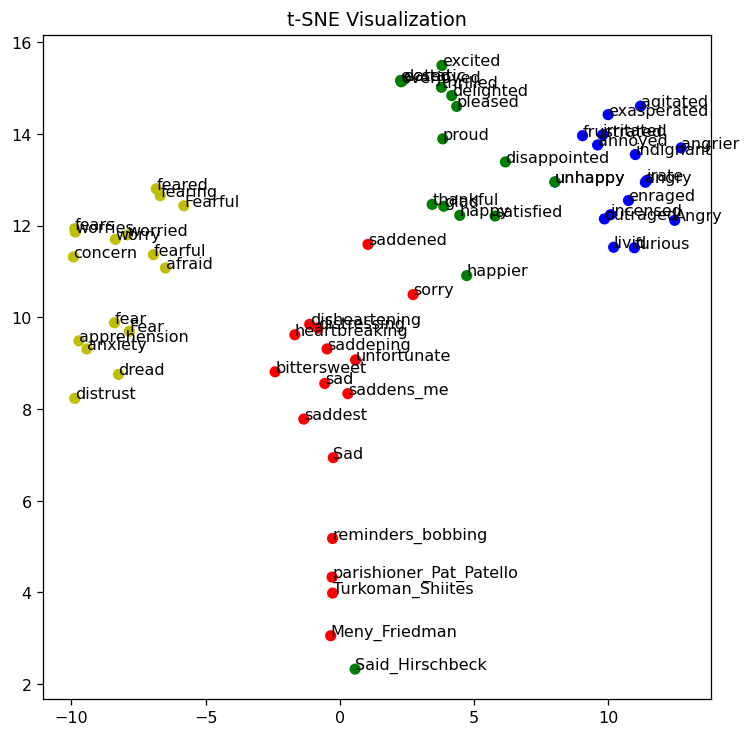

In [15]:
# Answer here
topn = 15

angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]     
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)] 
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

import matplotlib.pyplot as plt
import umap.umap_ as umap

import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.manifold import TSNE

model = w2v_google_model

# Prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

# UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)
X_umap = umap_model.fit_transform(X_train)

# t-SNE model
tsne_model = TSNE(n_components=2, random_state=28)
X_tsne = tsne_model.fit_transform(X_train)

# Plotting UMAP result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.title("UMAP Visualization")
plt.show()

# Plotting t-SNE result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.title("t-SNE Visualization")
plt.show()


# UMAP might show more coherent groupings for the emotional categories, 
# with potential overlaps if there are words that share similarities across emotions.
# t-SNE will likely show very distinct and separate clusters for each emotional category, 
# which might highlight the most similar words more clearly but could obscure relationships between different emotions.



### ** >>> Exercise 9 (Take home): **  

You noticed there is a **role** parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the **user** one.

In [16]:
# Answer here
import ollama
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'server',
        'content': 'What is data mining? (in markdown format)'
    },
])

print(response['message']['content'])

import pandas as pd
import numpy as np

# Create a DataFrame with some data
df = pd.DataFrame({
    'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar'],
    'B': [1, 2, 3, 4, 5, 6],
    'C': [np.random.randn(6), np.random.randn(6)]
})

print("Original DataFrame:")
print(df)

# Groupby and aggregate
grouped = df.groupby('A').mean()
print("\nGroupby and aggregate:")
print(grouped)



### ** >>> Exercise 10 (Take home): **  

Try asking the model with one image of your choosing. Is the description accurate? Why?
![alt text](pics/randompic.jpg)

In [17]:
# Answer here
from IPython.display import Markdown, display
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/randompic.jpg'] #Image with the dog
    },
])

display(Markdown(response3['message']['content']))


# The description from the model is quite accurate.
# because it effectively captures the key visual features of the generated image.

In the black and white line drawing, a majestic elephant stands tall on its hind legs. The elephant's trunk is extended upwards towards the sky, as if reaching for something unseen. Its large ears are spread out wide, adding to its imposing presence. The background features rays of light emanating from the top left corner, casting a dramatic illumination on the scene and highlighting the elephant's form. The drawing is simple yet evocative, capturing the essence of this magnificent creature in a minimalist style.


### ** >>> Exercise 11 (Take home): **  

Try to modify the code to make it accept **three URLs**, or **three text documents** of your choosing. After modifying it, make **three prompts/questions** with information that can be found in each of the documents/urls, **compare the accuracy of the response** with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.

In [18]:
# Answer here
import ollama
import bs4
from IPython.display import Markdown, display
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

llm_model = "llama3.2" #You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(urls):

    all_docs = []
    
    # Load documents from all URLs
    for url in urls:
        loader = WebBaseLoader(web_paths=[url], bs_kwargs={})
        docs = loader.load()
        all_docs.extend(all_docs)  # Accumulate documents from each URL

    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()

# Lists to store URLs and corresponding questions
urls = [
    "https://en.wikipedia.org/wiki/OpenAI",
    "https://en.wikipedia.org/wiki/Artificial_intelligence",
    "https://en.wikipedia.org/wiki/Machine_learning"
]

questions = [
    "What is the goal of OpenAI?",
    "Define Artificial Intelligence.",
    "Explain the difference between supervised and unsupervised learning in Machine Learning."
]

# Create the retriever
retriever = load_and_retrieve_docs(urls)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)


for i in questions:
    result = rag_chain(i)
    display(Markdown(result))
    print('===============================')
    
# RAG systems enhance accuracy and relevance by combining information retrieval with natural language generation, allowing for up-to-date and context-specific answers
# but they also come with disadvantages like increased complexity, dependence on the quality of retrieved data
# and potential inconsistencies between retrieved information and the model's internal knowledge.


USER_AGENT environment variable not set, consider setting it to identify your requests.
C:\Users\lihha\AppData\Local\Temp\ipykernel_43312\3645339790.py:28: LangChainDeprecationWarning:

The class `OllamaEmbeddings` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaEmbeddings``.



The goal of OpenAI is not explicitly stated in the provided text, but based on the context, it appears that OpenAI's primary focus is on:

1. Developing and optimizing AI systems, particularly machine learning algorithms.
2. Creating advanced AI models, such as those used in deep neural networks, to achieve significant improvements in performance and efficiency.

The text mentions specific examples of OpenAI's work, including the development of the AlphaZero model, which suggests that their goal is to advance the state-of-the-art in AI research and applications.

It is worth noting that the text does not provide any direct information on OpenAI's goals or mission statement. However, based on the context and the examples provided, it appears that OpenAI is focused on pushing the boundaries of AI research and development.

Artificial Intelligence (AI) refers to the development of computer systems that can perform tasks that typically require human intelligence, such as learning, problem-solving, decision-making, and perception.

In the context provided, AI can be defined as:

1. Explainable Artificial Intelligence (XAI): A type of AI where humans can understand the decisions or predictions made by the system.
2. Machine Learning: A subset of AI that involves training models on data to make accurate predictions or take actions.
3. Black Box AI: A concept in machine learning where even its designers cannot explain why an AI arrived at a specific decision.

In general, AI can be defined as:

"The development and application of computer systems that can think, learn, reason, and perceive like humans, with the ability to perform tasks that typically require human intelligence."

In Machine Learning, supervised and unsupervised learning are two fundamental approaches that differ in their objectives and methods.

**Supervised Learning**

In supervised learning, the algorithm learns from labeled data, where each example is accompanied by a corresponding label or target value. The goal is to learn a mapping between input data (features) and output data (labels), so that the algorithm can make accurate predictions on new, unseen data. The learning process involves training a model on the labeled data, adjusting its parameters to minimize errors in predictions.

In the context of the Titanic survival probability decision tree, this means that the algorithm would be trained on a dataset containing features such as passenger age, sex, class, and other relevant factors, along with their corresponding labels (survival or non-survival). The goal is to build a model that can accurately predict the likelihood of survival for new passengers based on their feature values.

**Unsupervised Learning**

In unsupervised learning, there is no labeled data available. Instead, the algorithm is trained on unlabeled data, and its objective is to identify patterns, relationships, or groupings in the data. The goal is to discover hidden structures or meaning in the data that may not be immediately apparent.

In the context of the Titanic survival probability decision tree, unsupervised learning might be used to identify clusters or groups within the dataset based on passenger characteristics, such as age and class. This could help identify passengers who are more likely to survive or perish, without relying on labeled data.

**Key differences**

1. **Labeled vs. unlabeled data**: Supervised learning relies on labeled data, while unsupervised learning uses unlabeled data.
2. **Objective**: The goal of supervised learning is to make accurate predictions on new data, while the objective of unsupervised learning is to identify patterns or relationships in the data.
3. **Training process**: In supervised learning, the model is trained on labeled data to minimize errors, while in unsupervised learning, the algorithm learns from unlabeled data by identifying patterns and relationships.

In summary, supervised learning is used when we have labeled data and want to make accurate predictions on new data, while unsupervised learning is used when we don't have labeled data and want to identify patterns or relationships in the data.

### ** >>> Exercise 12 (Take home): **

Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

In [19]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log_2.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.464434,1.210037,0.561960,1.121703
1,1,0.641019,0.877617,0.561960,1.046089
2,2,0.733739,0.692441,0.585014,1.089824
3,3,0.789648,0.564692,0.573487,1.117391
4,4,0.834210,0.450826,0.564842,1.268992
5,5,0.856906,0.392849,0.556196,1.441046
6,6,0.895931,0.294617,0.573487,1.436385
7,7,0.909770,0.258419,0.561960,1.571098
8,8,0.904512,0.259925,0.570605,1.662624
9,9,0.936895,0.182604,0.556196,1.711082


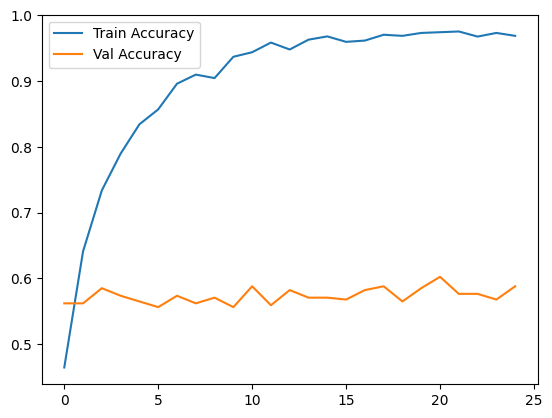

In [20]:
# Answer here
plt.plot(training_log['accuracy'], label='Train Accuracy')
plt.plot(training_log['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

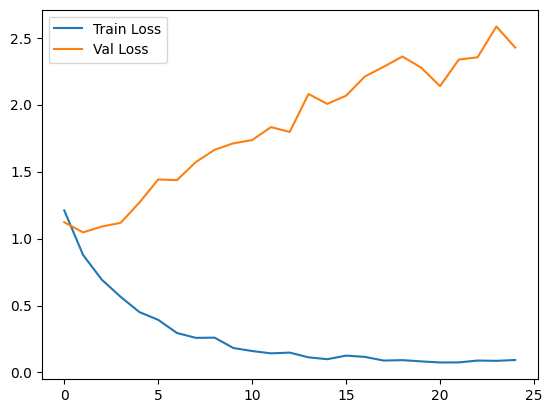

In [21]:
plt.plot(training_log['loss'], label='Train Loss')
plt.plot(training_log['val_loss'], label='Val Loss')
plt.legend()
plt.show()

### ** >>> Exercise 13 (Take home): **

Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.

In [22]:
# Answer here
# Zero-shot classification achieved the lowest accuracy and struggled with certain emotions like fear
# while 1-shot classification slightly improved overall performance but still faced class imbalances
# and 5-shot classification delivered the highest accuracy and more balanced results, 
# demonstrating that providing more labeled examples enhances the model’s ability to accurately classify emotions.

## Third Part

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam




In [2]:
data_id = pd.read_csv("data_identification.csv")
emotion = pd.read_csv("emotion.csv")
tweets = pd.read_json("tweets_DM.json", lines="True")


In [3]:
data_id.head()

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train


In [4]:
emotion.head()

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation


In [5]:
tweets.head()

,_score,_index,_source,_crawldate,_type
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets


In [3]:
# {'tweet': {'hashtags': ['Snapchat'], 'tweet_id': '0x376b20', 'text': 'People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <LH>'}}

tweets_DM = pd.DataFrame([{
    'tweet_id': item['tweet']['tweet_id'],
    'text': item['tweet']['text']
} for item in tweets['_source']])

tweets_DM.head()

,tweet_id,text
0,0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,0x28b412,"Confident of your obedience, I write to you, k..."
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,0x2de201,"""Trust is not the same as faith. A friend is s..."


In [4]:
merged_data = tweets_DM.merge(data_id, on='tweet_id', how='left').merge(emotion, on='tweet_id', how='left')

In [8]:
print(merged_data.head())
merged_data['emotion'].value_counts()

   tweet_id                                               text identification  \
0  0x376b20  People who post "add me on #Snapchat" must be ...          train   
1  0x2d5350  @brianklaas As we see, Trump is dangerous to #...          train   
2  0x28b412  Confident of your obedience, I write to you, k...           test   
3  0x1cd5b0                Now ISSA is stalking Tasha 😂😂😂 <LH>          train   
4  0x2de201  "Trust is not the same as faith. A friend is s...           test   

        emotion  
0  anticipation  
1       sadness  
2           NaN  
3          fear  
4           NaN  


emotion
joy             516017
anticipation    248935
trust           205478
sadness         193437
disgust         139101
fear             63999
surprise         48729
anger            39867
Name: count, dtype: int64

In [5]:
df_train = merged_data[merged_data.identification == 'train']
df_test = merged_data[merged_data.identification == 'test']

print(f"Training samples: {df_train.shape[0]}")
print(f"Test samples: {df_test.shape[0]}")

Training samples: 1455563
Test samples: 411972


In [32]:
df_train = df_train.sample(frac=1)
df_test = df_test.sample(frac=1)

# Tokenize and pad sequences
max_words = 20000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df_train['text'])

X_train = tokenizer.texts_to_sequences(df_train['text'])
X_train = pad_sequences(X_train, maxlen=max_len)

X_test = tokenizer.texts_to_sequences(df_test['text'])
X_test = pad_sequences(X_test, maxlen=max_len)

# Encode labels
emotions = df_train['emotion'].unique()
emotion_to_index = {emotion: index for index, emotion in enumerate(emotions)}
y_train = df_train['emotion'].map(emotion_to_index)
y_train = to_categorical(y_train, num_classes=len(emotions))

In [33]:
# Build LSTM model
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(emotions), activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\lihha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



In [34]:
# Train model


model.fit(X_train, y_train, batch_size=128, epochs=5, validation_split=0.2)

# Predictions and Evaluation
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert to original labels
index_to_emotion = {index: emotion for emotion, index in emotion_to_index.items()}
y_pred_labels = [index_to_emotion[index] for index in y_pred]

Epoch 1/5
9098/9098 ━━━━━━━━━━━━━━━━━━━━ 1087s 119ms/step - accuracy: 0.4766 - loss: 1.4566 - val_accuracy: 0.5661 - val_loss: 1.2081
Epoch 2/5
9098/9098 ━━━━━━━━━━━━━━━━━━━━ 978s 108ms/step - accuracy: 0.5650 - loss: 1.2323 - val_accuracy: 0.5820 - val_loss: 1.1664
Epoch 3/5
9098/9098 ━━━━━━━━━━━━━━━━━━━━ 562s 62ms/step - accuracy: 0.5844 - loss: 1.1779 - val_accuracy: 0.5871 - val_loss: 1.1554
Epoch 4/5
9098/9098 ━━━━━━━━━━━━━━━━━━━━ 550s 60ms/step - accuracy: 0.5998 - loss: 1.1365 - val_accuracy: 0.5889 - val_loss: 1.1498
Epoch 5/5
9098/9098 ━━━━━━━━━━━━━━━━━━━━ 546s 60ms/step - accuracy: 0.6115 - loss: 1.1048 - val_accuracy: 0.5918 - val_loss: 1.1563
12875/12875 ━━━━━━━━━━━━━━━━━━━━ 90s 7ms/step


In [ ]:
# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'id': df_test['tweet_id'],
    'emotion': y_pred_labels
})

# Save to CSV
submission_df.to_csv('sampleSubmission.csv', index=False)

# Using LSTM we get the result of 0.45
# Now we try Transformer

In [6]:
# Encode labels
emotions = df_train['emotion'].unique()
emotion_to_index = {emotion: index for index, emotion in enumerate(emotions)}
y_train = df_train['emotion'].map(emotion_to_index)
y_train = to_categorical(y_train, num_classes=len(emotions))

In [7]:
import pandas as pd
import numpy as np
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import DataLoader, Dataset

# Define custom dataset for PyTorch
class TweetDataset(Dataset):
    def __init__(self, texts, labels=None, tokenizer=None, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = str(self.texts[index])
        inputs = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        input_ids = inputs['input_ids'].squeeze()
        attention_mask = inputs['attention_mask'].squeeze()

        if self.labels is not None:
            label = torch.tensor(self.labels[index], dtype=torch.long)
            return {'input_ids': input_ids, 'attention_mask': attention_mask, 'label': label}
        else:
            return {'input_ids': input_ids, 'attention_mask': attention_mask}

# Initialize tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=len(emotions))

from sklearn.model_selection import train_test_split

# Split the training data into training and validation sets
df_train_split, df_val_split = train_test_split(df_train, test_size=0.1, random_state=42)

# Prepare the datasets
train_dataset = TweetDataset(df_train_split['text'].tolist(), df_train_split['emotion'].map(emotion_to_index).tolist(), tokenizer)
val_dataset = TweetDataset(df_val_split['text'].tolist(), df_val_split['emotion'].map(emotion_to_index).tolist(), tokenizer)
test_dataset = TweetDataset(df_test['text'].tolist(), labels=None, tokenizer=tokenizer)

# Update training arguments to include evaluation
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',  # Enable evaluation at the end of each epoch
    save_strategy='epoch',
    learning_rate=1e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    report_to = []
)

# Initialize Trainer with the validation dataset
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset  # Add the validation dataset
)



# Train the model
trainer.train()

# Make predictions on test data
predictions = trainer.predict(test_dataset)
predicted_labels = np.argmax(predictions.predictions, axis=1)
index_to_emotion = {index: emotion for emotion, index in emotion_to_index.items()}
y_pred_labels = [index_to_emotion[label] for label in predicted_labels]

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'id': df_test['tweet_id'],
    'emotion': y_pred_labels
})

# Save the submission file
submission_df.to_csv('sampleSubmission.csv', index=False)
print("Submission file 'sampleSubmission.csv' created successfully.")

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\lihha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


  0%|          | 0/327502 [00:00<?, ?it/s]

  0%|          | 0/18195 [00:00<?, ?it/s]

  0%|          | 0/18195 [00:00<?, ?it/s]

{'eval_loss': 0.8855189681053162, 'eval_runtime': 421.358, 'eval_samples_per_second': 345.447, 'eval_steps_per_second': 43.182, 'epoch': 2.0}
{'train_runtime': 42388.8914, 'train_samples_per_second': 61.809, 'train_steps_per_second': 7.726, 'train_loss': 0.9245299861067942, 'epoch': 2.0}


  0%|          | 0/51497 [00:00<?, ?it/s]

Submission file 'sampleSubmission.csv' created successfully.
